In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import rasterio
from rasterio.plot import show
import os
from palettable.colorbrewer.qualitative import Paired_12
import cv2
from pathlib import Path

uint16_max = 65535

In [5]:
base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22"

dataset = rasterio.open(os.path.join(base_folder, "NDVI.tif"))
ndvi_real = dataset.read(1)

dataset.close()
dataset = rasterio.open(os.path.join(base_folder, "poisson_approximated", "NDVI.tif"))
ndvi_poisson = dataset.read(1)

dataset.close()
base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22/test_images"
dataset = rasterio.open(os.path.join(base_folder, "NDVI.tif"))
ndvi_manual = dataset.read(1)
dataset.close()

base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-17"
dataset = rasterio.open(os.path.join(base_folder, "NDVI.tif"))
ndvi_other = dataset.read(1)
dataset.close()

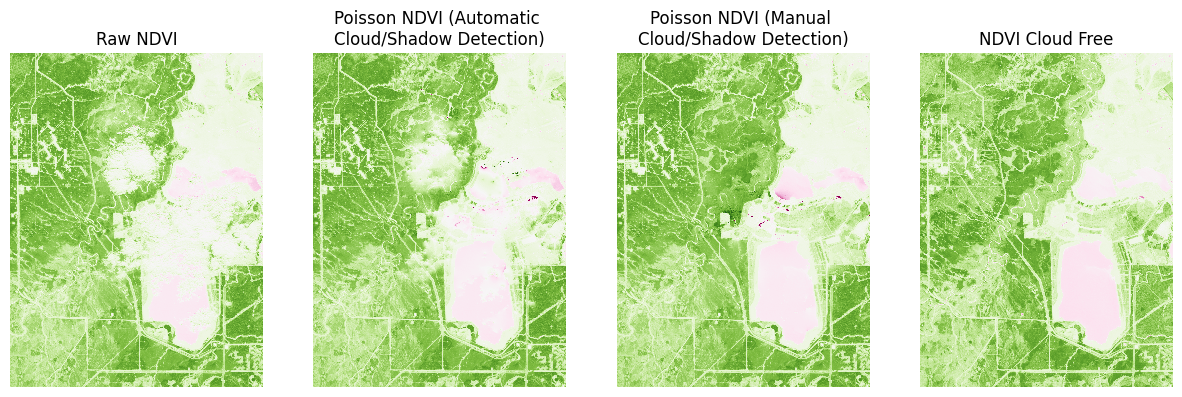

In [12]:
save = False

fig, ax = plt.subplots(1, 4, figsize=(15, 8))

cmap = "PiYG"

ax[0].imshow(ndvi_real, vmin=-1.0, vmax=1.0, interpolation="none", cmap=cmap)
ax[0].set_title("Raw NDVI")
ax[0].axis("off")

ax[1].imshow(ndvi_poisson, vmin=-1.0, vmax=1.0, interpolation="none", cmap=cmap)
ax[1].set_title("Poisson NDVI (Automatic \nCloud/Shadow Detection)")
ax[1].axis("off")

ax[2].imshow(ndvi_manual, vmin=-1.0, vmax=1.0, interpolation="none", cmap=cmap)
ax[2].set_title("Poisson NDVI (Manual \nCloud/Shadow Detection)")
ax[2].axis("off")

ax[3].imshow(ndvi_other, vmin=-1.0, vmax=1.0, interpolation="none", cmap=cmap)
ax[3].set_title("NDVI Cloud Free")
ax[3].axis("off")

if save:
    fig.savefig("comparing_ndvi_results.png", dpi=300, bbox_inches="tight")

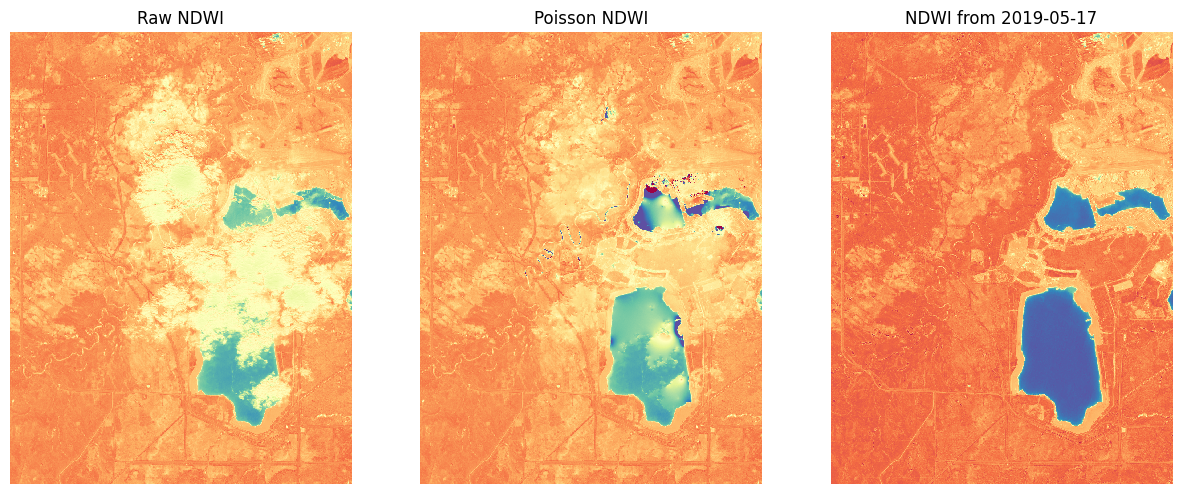

In [4]:
save = True

base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22"
dataset = rasterio.open(os.path.join(base_folder, "mNDWI.tif"))
ndwi_real = dataset.read(1)

dataset.close()
dataset = rasterio.open(os.path.join(base_folder, "poisson_approximated", "mNDWI.tif"))
ndwi_poisson = dataset.read(1)

dataset.close()
base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-17"
dataset = rasterio.open(os.path.join(base_folder, "mNDWI.tif"))
ndwi_near = dataset.read(1)
dataset.close()

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].imshow(ndwi_real, vmin=-1.0, vmax=1.0, interpolation="none", cmap="Spectral")
ax[0].set_title("Raw NDWI")
ax[0].axis("off")

ax[1].imshow(ndwi_poisson, vmin=-1.0, vmax=1.0, interpolation="none", c
ax[0].axis("off")

ax[1].imshow(ndwi_poisson, vmin=-1.0, vmax=1.0, interpolation="none", cmap="Spectral")
ax[1].set_title("Poisson NDWI")
ax[1].axis("off")

ax[2].imshow(ndwi_near, vmin=-1.0, vmax=1.0, interpolation="none", cmap="Spectral")
ax[2].set_title("NDWI from 2019-05-17")
ax[2].axis("off")

if save:
    fig.savefig("comparing_ndwi_results.png", dpi=300, bbox_inches="tight")

In [25]:
# Show the Detected clouds and shadows over the RGB image

base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22"
dataset = rasterio.open(os.path.join(base_folder, "cloud_mask.tif"))
clouds = dataset.read(1)

dataset.close()
dataset = rasterio.open(os.path.join(base_folder, "shadow_mask.tif"))
shadows = dataset.read(1)

dataset.close()
dataset = rasterio.open(os.path.join(base_folder, "RGB.tif"))
rgb = dataset.read()

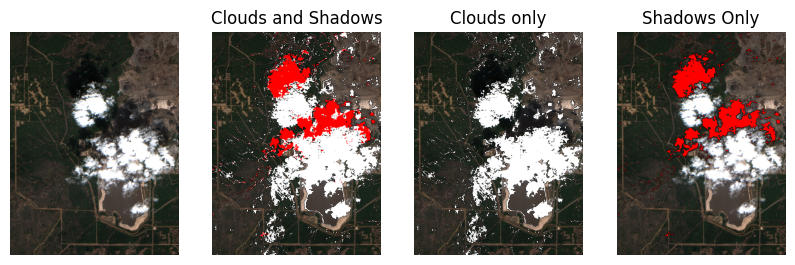

In [26]:
rgb_image = np.transpose(rgb, (1, 2, 0))

norm = colors.Normalize(vmin=rgb_image.min(), vmax=rgb_image.max())
rgb_image = norm(rgb_image)

mask = np.bitwise_or(clouds, shadows)
mask_image = np.zeros((*mask.shape, 4))

save = True

fig, ax = plt.subplots(1, 4, figsize=(10, 8))
ax[0].imshow(rgb_image)
ax[0].axis("off")
ax[1].set_title("RGB Image")

ax[1].imshow(rgb_image)
mask_image[..., 0] = mask
mask_image[..., 1] = clouds
mask_image[..., 2] = clouds
mask_image[..., 3] = mask
ax[1].imshow(mask_image)
ax[1].set_title("Clouds and Shadows")
ax[1].axis("off")

ax[2].imshow(rgb_image)
mask_image = np.zeros((*mask.shape, 4))
mask_image[..., 0] = clouds
mask_image[..., 1] = clouds
mask_image[..., 2] = clouds
mask_image[..., 3] = clouds
ax[2].imshow(mask_image)
ax[2].set_title("Clouds only")
ax[2].axis("off")

ax[3].imshow(rgb_image)
mask_image = np.zeros((*mask.shape, 4))
mask_image[..., 0] = shadows
mask_image[..., 3] = shadows
ax[3].imshow(mask_image)
ax[3].set_title("Shadows Only")
ax[3].axis("off")

if save:
    fig.savefig("comparing_cloud_and_shadow_masks.png", dpi=300, bbox_inches="tight")

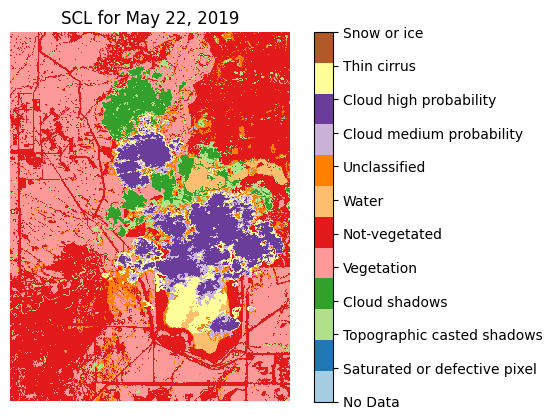

In [6]:
# Plt the scene classification

base_folder = "/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22"
dataset = rasterio.open(os.path.join(base_folder, "SCL.tif"))
scl = dataset.read(1)

scl_info = [
 "No Data",
 "Saturated or defective pixel",
 "Topographic casted shadows",
 "Cloud shadows",
 "Vegetation",
 "Not-vegetated",
 "Water",
 "Unclassified",
 "Cloud medium probability",
 "Cloud high probability",
 "Thin cirrus",
 "Snow or ice"
]

save = True

cmap = colors.ListedColormap(Paired_12.mpl_colors)

plt.imshow(scl, interpolation="none", cmap=cmap, vmin=0, vmax=11)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0, 12, 1))
cbar.set_ticklabels([x for x in scl_info])
plt.axis("off")
plt.title("SCL for May 22, 2019")

if save:
    plt.savefig("scl_05_11_2019.png", dpi=300, bbox_inches="tight")

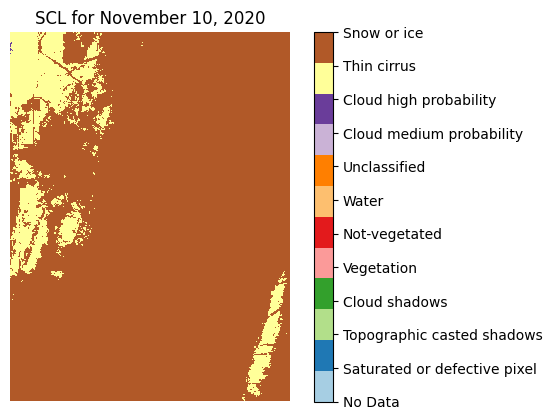

In [10]:
base_folder = Path("/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2020-11-10")
dataset = rasterio.open(base_folder.joinpath("SCL.tif"))
scl = dataset.read(1)

plt.imshow(scl, interpolation="none", cmap=cmap, vmin=0, vmax=11)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0, 12, 1))
cbar.set_ticklabels([x for x in scl_info])
plt.axis("off")
plt.title("SCL for November 10, 2020")

if save:
    plt.savefig("scl_2020_11_10.png", dpi=300, bbox_inches="tight")

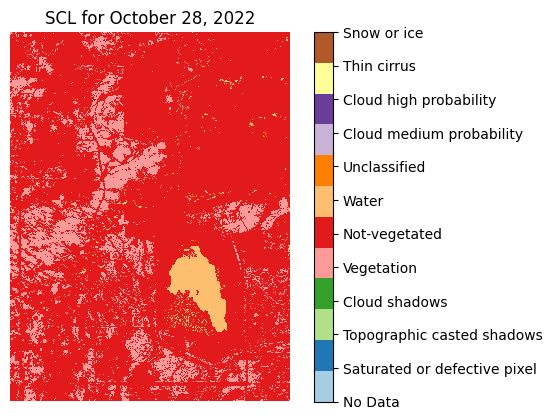

In [9]:
base_folder = Path("/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2022-10-28")
dataset = rasterio.open(base_folder.joinpath("SCL.tif"))
scl = dataset.read(1)

plt.imshow(scl, interpolation="none", cmap=cmap, vmin=0, vmax=11)
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0, 12, 1))
cbar.set_ticklabels([x for x in scl_info])
plt.axis("off")
plt.title("SCL for October 28, 2022")

if save:
    plt.savefig("scl_2022_10_28.png", dpi=300, bbox_inches="tight")

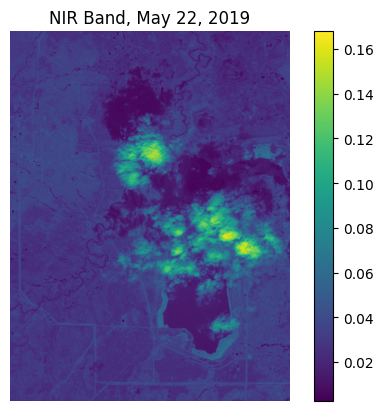

In [18]:
base_folder = Path("/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22")
dataset = rasterio.open(os.path.join(base_folder, "B08.tif"))
nir = dataset.read(1) / float(uint16_max)

plt.imshow(nir)
plt.colorbar()
plt.title("NIR Band, May 22, 2019")
plt.axis("off")

plt.savefig("nir.png", dpi=300, bbox_inches="tight")

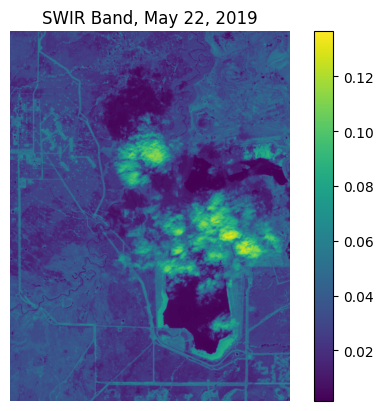

In [22]:
swir = rasterio.open(base_folder.joinpath("B11.tif")).read(1) / float(uint16_max)

plt.imshow(swir)
plt.colorbar()
plt.title("SWIR Band, May 22, 2019")
plt.axis("off")

plt.savefig("swir.png", dpi=300, bbox_inches="tight")

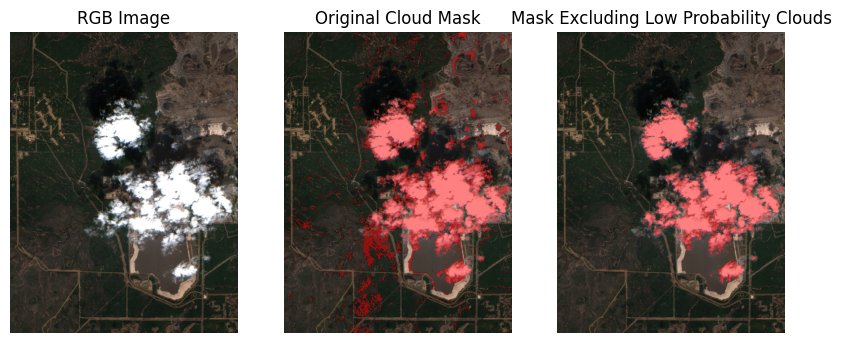

In [39]:
base_folder = Path("/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22")

save = True

old_mask = rasterio.open(base_folder.joinpath("testing_cloud_detection").joinpath("old_mask.tif")).read(1)

# This just comes from excluding the low probability clouds in the SCL
new_mask = rasterio.open(base_folder.joinpath("testing_cloud_detection").joinpath("new_mask.tif")).read(1)

mask_image = np.zeros((*old_mask.shape, 4))

fig, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(rgb_image)
ax[0].axis("off")
ax[0].set_title("RGB Image")

ax[1].imshow(rgb_image)
ax[1].axis("off")
mask_image[..., 0] = old_mask
mask_image[..., 3] = old_mask * 0.5
ax[1].imshow(mask_image)
ax[1].set_title("Original Cloud Mask")

mask_image[..., 0] = new_mask
mask_image[..., 3] = new_mask * 0.5
ax[2].imshow(rgb_image)
ax[2].imshow(mask_image)
ax[2].axis("off")
ax[2].set_title("Mask Excluding Low Probability Clouds")

if save:
    fig.savefig("comparing_cloud_masks.png", dpi=300, bbox_inches="tight")